In [1]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered.csv")

<Axes: ylabel='Binding_Energy_eV'>

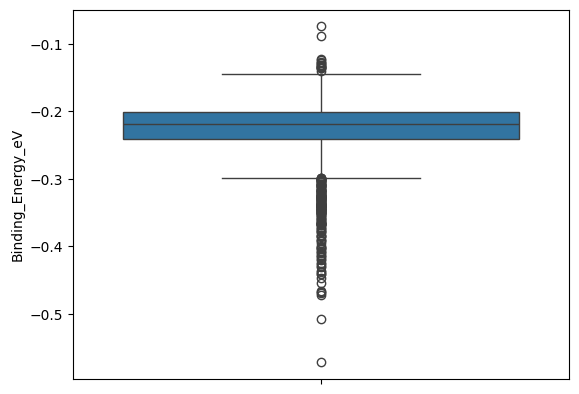

In [9]:
sns.boxplot(df["Binding_Energy_eV"])

In [10]:
df = df[df["Binding_Energy_eV"] > -0.35]
df.head()

,solubility_CO2 [mol/L],viscosity [Pa s],nBase,SpAbs_A,SpMax_A,SpDiam_A,SpMAD_A,VE1_A,VE2_A,VE3_A,...,homo_lumo_gap_eV,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,vib_freq_min_cm1,vib_freq_max_cm1,solvent_ID,smiles,Binding_Energy_eV
0,0.097848,0.011764,0.0,12.906117,2.122425,4.244850,1.173283,2.894598,0.263145,1.158157,...,181.930993,-0.832151,0.392923,0.034817,0.832151,23.0414,3627.7857,zinc_5593217,COCCNC(=O)[C@@H](CC)C,-0.246414
1,0.117575,0.007448,1.0,17.343700,2.348592,4.557405,1.334131,3.134592,0.241122,1.404863,...,161.701629,-1.140739,0.562172,0.001836,1.140739,28.8558,3225.7980,zinc_400210175,CO[C@H](C1CC1)CN1CCCCC1,-0.239933
3,0.088216,0.025603,1.0,14.943352,2.294945,4.451333,1.149489,3.070361,0.236182,1.384159,...,171.357226,-0.794729,0.647513,0.076133,0.794729,26.9357,3729.3970,zinc_685002938,C[C@@H](CN(CC1CC1)CC(F)F)O,-0.325154
4,0.131763,0.001110,1.0,10.199109,2.119166,4.238332,1.133234,2.712314,0.301368,0.892442,...,167.803019,-0.847175,0.397601,0.172656,0.847175,62.5690,3522.0361,zinc_52602135,CNC[C@@H](C(C)C)OC,-0.288984
5,0.194861,0.000591,0.0,7.878462,1.969616,3.939231,1.125495,2.458387,0.351198,0.542830,...,209.853735,-0.836357,0.670882,0.155141,0.836357,31.4461,3175.9896,zinc_404765,CCCC(=O)OC,-0.159161


In [11]:
meta_cols = ['solvent_ID', 'smiles', 'solubility_CO2 [mol/L]', 'viscosity [Pa s]']
target = 'Binding_Energy_eV'  # or 'solubility_CO2 [mol/L]', 'viscosity [Pa s]'
X = df.drop(columns=meta_cols + [target], axis=1)
y = df[target]

In [12]:
df['Binding_Energy_eV'].head()

0   -0.246414
1   -0.239933
3   -0.325154
4   -0.288984
5   -0.159161
Name: Binding_Energy_eV, dtype: float64

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2798 entries, 0 to 2891
Columns: 501 entries, solubility_CO2 [mol/L] to Binding_Energy_eV
dtypes: float64(499), object(2)
memory usage: 10.7+ MB


In [15]:
X.describe()

,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpMAD_A,VE1_A,VE2_A,VE3_A,VR1_A,nAtom,...,dipole_moment_D,homo_eV,lumo_eV,homo_lumo_gap_eV,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,vib_freq_min_cm1,vib_freq_max_cm1
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,...,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,0.864904,12.843756,2.202206,4.334786,1.181133,2.924899,0.276738,1.131069,51.099638,28.444246,...,2.050084,-170.213613,-1.190748,169.022864,-0.804379,0.468575,0.062702,0.822117,43.132703,3485.659774
std,0.411201,2.594748,0.131615,0.224932,0.064962,0.256371,0.041826,0.300103,31.719919,6.192676,...,1.074707,14.449711,5.627436,13.867277,0.158761,0.218873,0.051737,0.167866,28.702303,239.719298
min,0.000000,4.472136,1.618034,3.236068,0.960081,1.946498,0.191565,-0.250259,5.891993,4.000000,...,0.000000,-281.011930,-78.103708,122.235118,-1.944315,0.199493,0.000041,0.323770,7.184400,2432.733000
25%,1.000000,11.192702,2.119166,4.200756,1.138723,2.761770,0.248282,0.981379,32.747610,24.000000,...,1.199589,-175.564889,-3.413520,160.740883,-0.882853,0.354590,0.020677,0.716989,27.344850,3222.271950
50%,1.000000,13.314837,2.214320,4.350655,1.180892,2.965687,0.265895,1.209805,46.151834,29.000000,...,1.920239,-166.947788,-0.370230,167.106986,-0.813426,0.448416,0.049391,0.825051,36.063850,3505.543250
75%,1.000000,14.817251,2.295943,4.492769,1.228864,3.118535,0.294202,1.347856,60.095117,33.000000,...,2.571951,-161.286972,2.117715,173.660056,-0.706243,0.491836,0.092330,0.897385,48.893075,3726.131175
max,2.000000,18.227421,2.663123,4.939098,1.398294,3.505427,0.486624,1.590784,411.098057,41.000000,...,7.945263,-133.408657,11.358655,231.675088,-0.323770,1.809124,0.564214,1.944315,374.040100,3805.516500


<Axes: >

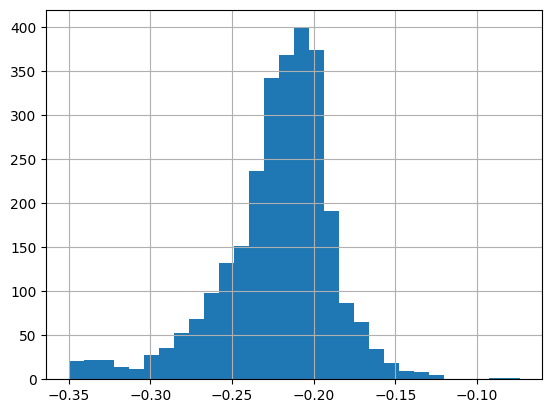

In [16]:
y.hist(bins=30)

In [17]:
# y_log = np.log1p(y)  # log1p handles small values safely
# y_log.hist(bins=30)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
# Apply log transform
# y_log = np.log1p(y)  # log1p handles small values safely
# Step 2: Fit and transform the target (y_train), transform y_test
from sklearn.preprocessing import PowerTransformer

# Step 1: Initialize transformer
pt = PowerTransformer(method='yeo-johnson')
y_train_trans = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test_trans = pt.transform(y_test.values.reshape(-1, 1)).flatten()

<Axes: ylabel='Count'>

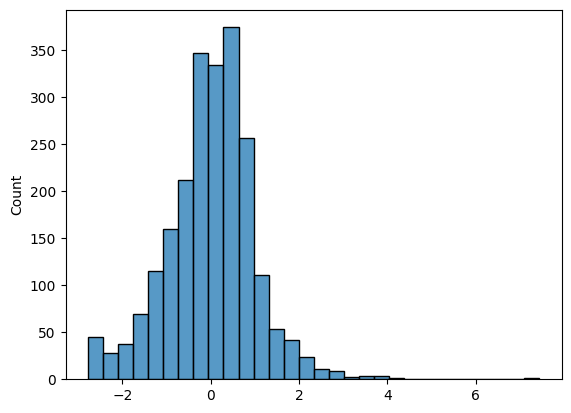

In [20]:
import seaborn as sns
sns.histplot(y_train_trans, bins=30)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train_log)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# # # XGB model with GPU support
from xgboost import XGBRegressor
xgb = XGBRegressor(
    tree_method='gpu_hist',  # key line for GPU
    device='cuda', 
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'subsample': [0.6, 0.8, 1.0],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    'colsample_bytree': [0.6, 0.8, 1.0],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'reg_lambda': [0.1, 0.5, 1, 5]
}

# param_dist = {
#     'n_estimators':[100, 200, 300, 500],
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse']
# }


# # RandomizedSearchCV with GPU-based XGBoost
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1,
    n_jobs=1  # must be 1 when using GPU with XGBoost
)

random_search.fit(X_train_scaled, y_train)

# # # RandomizedSearchCV with GPU-based XGBoost
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=30,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     verbose=1,
#     n_jobs=1  # must be 1 when using GPU with XGBoost
# )

# # # Train the model
# random_search.fit(X_train_scaled, y_train_log)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:56:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\core.py:2676: UserWarning: [02:56:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\core.py:729: UserWarning: [02:56:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to predic

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constra...
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_lambda': [0.1, 0.5, 1, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_mean_squared_error', verbose=1)

In [24]:
# best_params

In [25]:
best_params = random_search.best_params_
final_model = XGBRegressor(
    **best_params,
    tree_method='gpu_hist',
    device='cuda',
    random_state=42
)
# best_params = random_search.best_params_

In [26]:
final_model.fit(
    X_train_scaled,
    y_train,
    verbose=True
)
# final_model = random_search.best_estimator_

c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# random_search.best_estimator_.get_params

In [28]:

# 5. Evaluation
# y_pred_log = model.predict(X_test_scaled)
y_pred_orig = final_model.predict(X_test_scaled)
# y_pred_trans = final_model.predict(X_test_scaled)
# y_pred_orig = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
# Inverse log1p
# y_pred = np.expm1(y_pred_log)
# y_test = np.expm1(y_test_log)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
r2 = r2_score(y_test, y_pred_orig, multioutput='variance_weighted')

print(f"Fixed RMSE: {rmse:.4f}")
print(f"Fixed R²: {r2:.4f}")

Fixed RMSE: 0.0307
Fixed R²: 0.2332


c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\core.py:2676: UserWarning: [12:17:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [29]:
feature_names = X.columns.tolist()  # This should match the model's input

c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


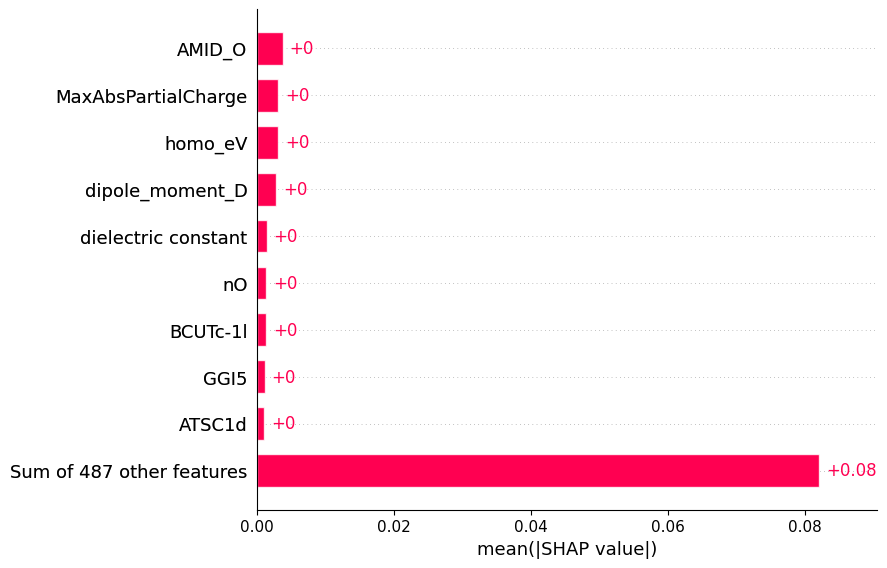

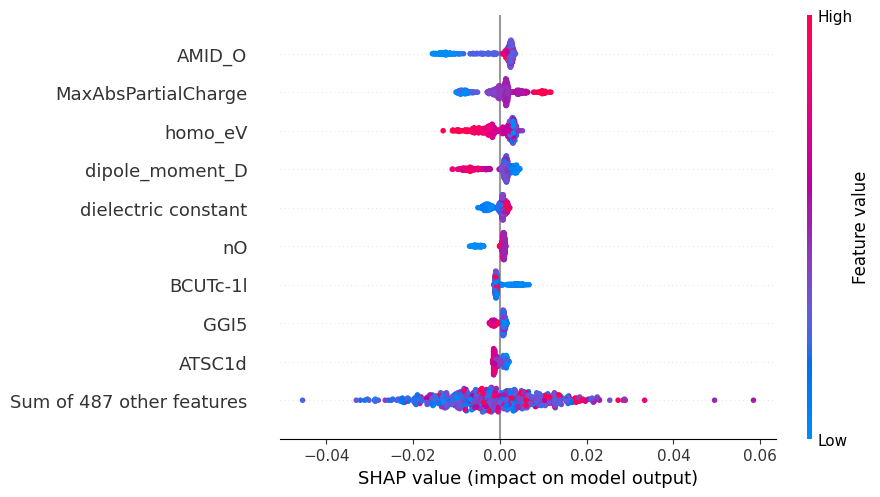

In [30]:
import shap

explainer = shap.Explainer(final_model, X_test_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled)

shap.plots.bar(shap_values, max_display=10)
shap.plots.beeswarm(shap_values, max_display=10)

In [26]:
# Use scaled test set for SHAP input
# import shap
# explainer = shap.Explainer(final_model, feature_names=feature_names)
# shap_values = explainer(X_test_scaled)

# log_shap = shap_values.values
# delta_viscosity = np.expm1(y_pred.reshape(-1, 1) + log_shap) - np.expm1(y_pred.reshape(-1, 1))

# # ----------- Step 4: Wrap new SHAP values in Explanation object -----------
# shap_values_original = shap.Explanation(
#     values=delta_viscosity,
#     base_values=np.expm1(shap_values.base_values),  # base values in original scale
#     data=X_test_scaled,
#     feature_names=X.columns
# )

# # ----------- Step 5: Plot SHAP bar plot in original scale -----------
# shap.plots.bar(shap_values_original, max_display=10)

In [27]:

# Calculate "original scale SHAP values" via finite differences
# shap_orig_values = []
# for i in range(len(X_test_scaled)):
#     # For each instance
#     contribs = []
#     for j in range(len(X.columns)):
#         delta_log = shap_values.values[i][j]
        
#         # Finite difference in original scale
#         orig_with = np.expm1(y_pred_log[i] + delta_log)
#         orig_base = y_pred[i]
#         delta_orig = orig_with - orig_base
        
#         contribs.append(delta_orig)
    
#     shap_orig_values.append(contribs)

# shap_orig_values = np.array(shap_orig_values)

# # Wrap into Explanation object
# shap_values_original = shap.Explanation(
#     values=shap_orig_values,
#     base_values=np.expm1(shap_values.base_values),
#     data=X_test_scaled,
#     feature_names=X.columns
# )

# # Plot in original scale
# shap.plots.bar(shap_values_original, max_display=10)
# shap.plots.beeswarm(shap_values_original, max_display=10)

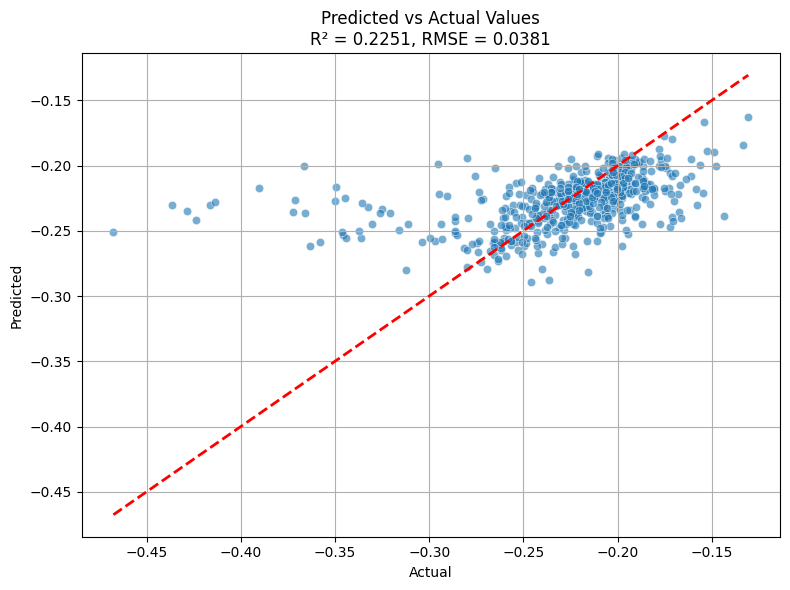

In [28]:
residuals = y_test - y_pred_orig

import matplotlib.pyplot as plt
import seaborn as sns 

# --- A. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_orig, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.title(f"Predicted vs Actual Values\nR² = {r2:.4f}, RMSE = {rmse:.4f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

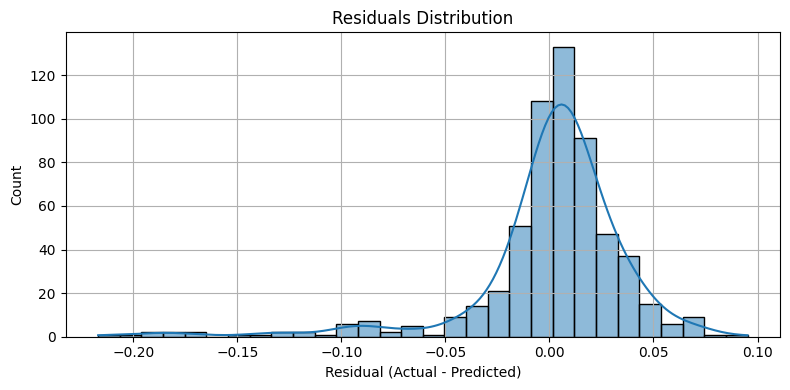

In [29]:
# --- B. Histogram of Residuals ---
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()